In [ ]:
!pip install geopandas

In [ ]:
!pip install pandas fiona shapely pyproj rtree

In [4]:
import geopandas


In [6]:
import geopandas

geo_df = geopandas.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")

geo_df.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908..."
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774..."
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028..."
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ..."
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ..."


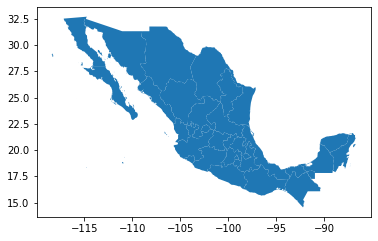

In [6]:
geo_df.plot()

In [8]:
import pandas as pd
import io 
import requests

data = requests.get("https://simplemaps.com/static/data/country-cities/mx/mx.csv")

df = pd.read_csv(io.StringIO(data.content.decode('utf-8')))

df.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Mexico City,19.4333,-99.1333,Mexico,MX,Ciudad de México,primary,20996000.0,8918653.0
1,Guadalajara,20.6767,-103.3475,Mexico,MX,Jalisco,admin,5253000.0,1460148.0
2,Monterrey,25.6667,-100.3000,Mexico,MX,Nuevo León,admin,4295000.0,1109171.0
3,Tijuana,32.5250,-117.0333,Mexico,MX,Baja California,minor,2384609.0,1902385.0
4,Ecatepec,19.6097,-99.0600,Mexico,MX,México,minor,1656107.0,1656107.0


In [9]:
geo_df2 = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.lng, df.lat), crs="EPSG:4326")

geo_df2.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,geometry
0,Mexico City,19.4333,-99.1333,Mexico,MX,Ciudad de México,primary,20996000.0,8918653.0,POINT (-99.13330 19.43330)
1,Guadalajara,20.6767,-103.3475,Mexico,MX,Jalisco,admin,5253000.0,1460148.0,POINT (-103.34750 20.67670)
2,Monterrey,25.6667,-100.3000,Mexico,MX,Nuevo León,admin,4295000.0,1109171.0,POINT (-100.30000 25.66670)
3,Tijuana,32.5250,-117.0333,Mexico,MX,Baja California,minor,2384609.0,1902385.0,POINT (-117.03330 32.52500)
4,Ecatepec,19.6097,-99.0600,Mexico,MX,México,minor,1656107.0,1656107.0,POINT (-99.06000 19.60970)


In [25]:
intersect = geopandas.overlay(geo_df2, geo_df, how='intersection')


In [26]:
intersect.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,Mexico City,19.4333,-99.1333,Mexico,MX,Ciudad de México,primary,20996000.0,8918653.0,9,Distrito Federal,Distrito Federal,4.8,0.68,16.48,80.72,172.88,2.12,POINT (-99.13330 19.43330)
1,Guadalajara,20.6767,-103.3475,Mexico,MX,Jalisco,admin,5253000.0,1460148.0,14,Jalisco,Jalisco,17.4,8.96,27.43,62.32,81.43,1.29,POINT (-103.34750 20.67670)
2,Zapopan,20.7167,-103.4000,Mexico,MX,Jalisco,minor,1155790.0,1155790.0,14,Jalisco,Jalisco,17.4,8.96,27.43,62.32,81.43,1.29,POINT (-103.40000 20.71670)
3,Tlajomulco de Zúñiga,20.4736,-103.4431,Mexico,MX,Jalisco,minor,727750.0,727750.0,14,Jalisco,Jalisco,17.4,8.96,27.43,62.32,81.43,1.29,POINT (-103.44310 20.47360)
4,Tlaquepaque,20.6167,-103.3167,Mexico,MX,Jalisco,minor,575942.0,575942.0,14,Jalisco,Jalisco,17.4,8.96,27.43,62.32,81.43,1.29,POINT (-103.31670 20.61670)


In [30]:
grouped = intersect.groupby(['id','state'])['population'].agg('sum')

grouped.head()

id  state              
1   Aguascalientes         1134592.0
2   Baja California        3096413.0
3   Baja California Sur     562887.0
4   Campeche                337689.0
5   Chiapas                2069811.0
Name: population, dtype: float64

In [31]:
merge = pd.merge(geo_df, grouped, on="id")


In [32]:
merge.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,population
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",1134592.0
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",3096413.0
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",562887.0
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",337689.0
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",2069811.0


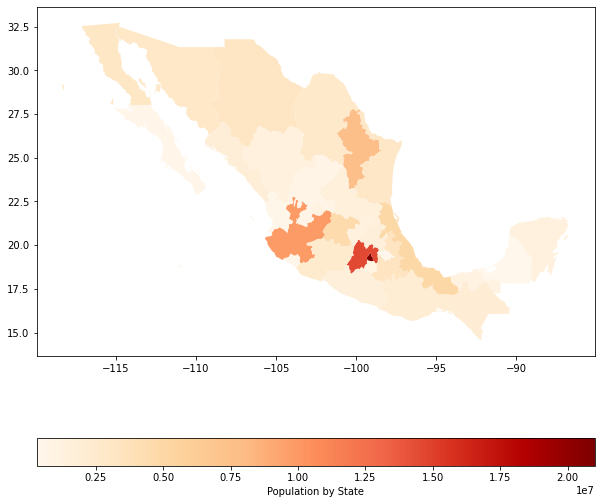

In [56]:
import matplotlib.pyplot as plt

merge.plot(column='population', figsize=(10,10), legend_kwds={'label': "Population by State", 'orientation': "horizontal"}, legend=True, cmap='OrRd')